In [1]:
import pandas as pd

In [2]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

In [6]:
df = pd.read_excel('phe/tRNA_AcidDeg_SN2_nona.xlsx')
df.shape

(9836, 15)

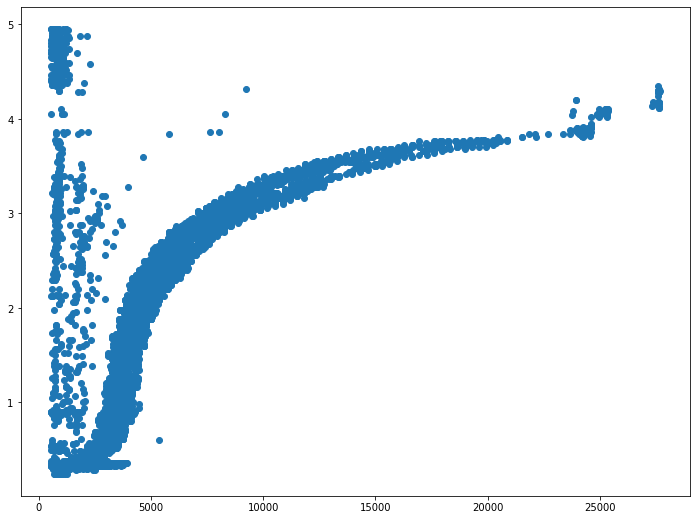

In [7]:
plot_zone(df)

In [8]:
# get cpds with top Vols
df[df.Mass > 20000].sort_values('Vol', ascending=False).iloc[:20][['Mass', 'RT', 'Vol']]

,Mass,RT,Vol
12,24529.060816,3.884637,5593140.05
19,24199.987070,3.884637,4190912.13
21,24533.116006,3.859285,3859824.29
24,24210.042468,3.844311,3600660.40
27,24537.061202,3.859285,3229078.85
36,24207.998817,3.824044,2486969.25
51,24214.036902,3.859285,2041410.04
62,24221.013046,3.859285,1667086.32
75,24233.995702,3.844311,1518042.18
86,24216.032965,3.844311,1407943.55


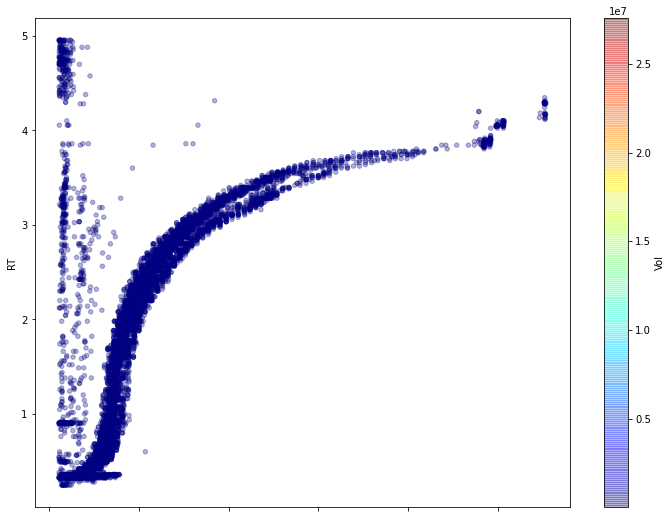

In [9]:
df.plot(kind='scatter', x='Mass', y='RT', c='Vol', alpha=0.3, cmap=plt.get_cmap('jet'), colorbar=True, figsize=(12, 9))

In [10]:
df_label, df_unlabel = label_unlabel_comparison(df, df)

df3_idxs 4824 df5_idxs 4962


In [11]:
df_label.shape, df_unlabel.shape

((4824, 15), (4962, 15))

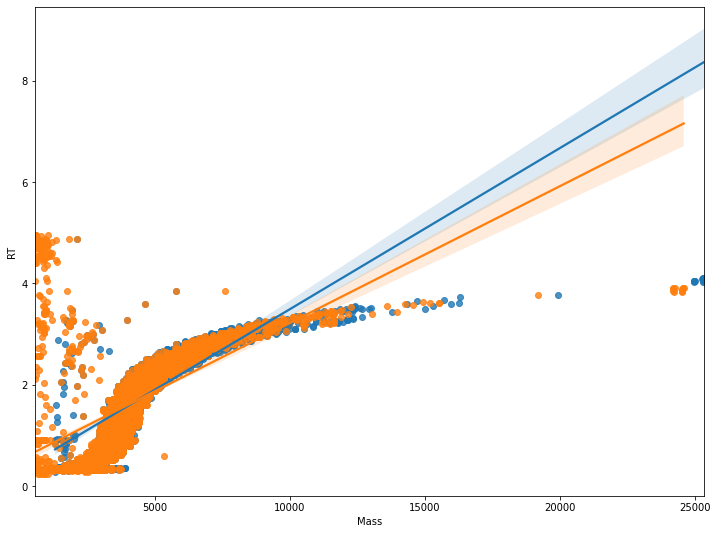

In [13]:
plot_zones(df_label, df_unlabel)

In [14]:
df_ms, _ = computational_data_seperation(df, df, 24529.060816, ignore_endpoints=True)
df_ms.shape

df3 429 df5 429


(429, 15)

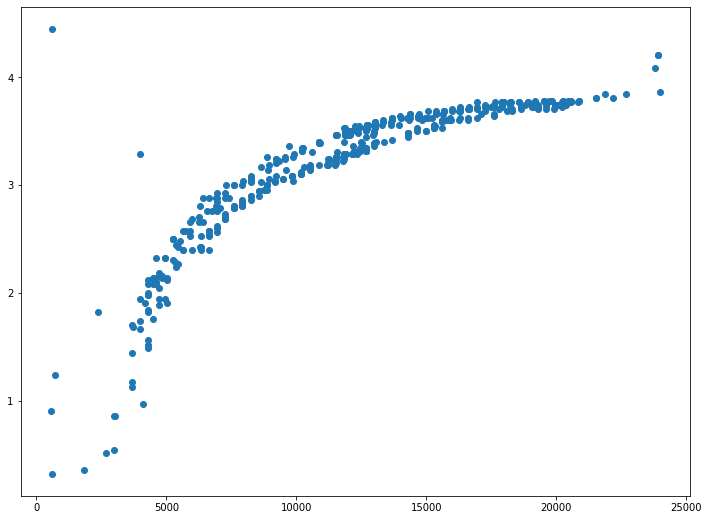

In [16]:
plot_zone(df_ms)

In [19]:
df_3p_common = pd.merge(df_ms, df_label, how='inner')

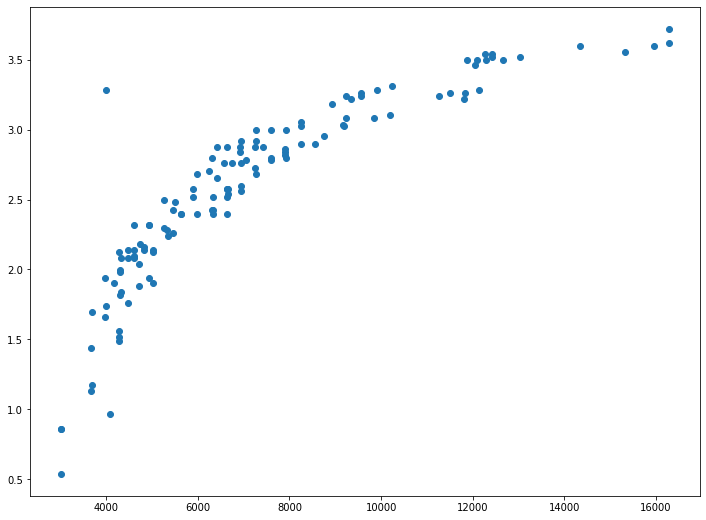

In [20]:
plot_zone(df_3p_common)

In [3]:
df = pd.read_excel('/Users/bryan/Downloads/oligosdegradsample2.xlsx')
df.shape

(1386, 14)

In [4]:
df_big = df[df.Mass>22000].sort_values('Vol', ascending=False)[:10][['Mass', 'Vol', 'RT']]
df_big

,Mass,Vol,RT
1363,24252.354538,36982472.75,3.844311
1369,24581.417714,21547144.54,3.884637
1365,24280.354981,6036971.94,3.859285
1364,24267.345632,5551185.07,3.844311
1371,24609.413063,3170775.70,3.884637
1370,24596.389890,3084010.49,3.884637
1366,24309.354098,1460313.21,3.859285
1367,24331.331703,1259745.41,3.884637
1361,24027.301692,1083931.98,3.884637
1377,25334.637863,1082678.51,4.082539


In [5]:
full_mass = df_big.iloc[0].Mass
print(full_mass)
df_ms, _ = computational_data_seperation(df, df, full_mass=full_mass, ignore_endpoints=True)
df_ms.shape

24252.3545376099
df3 94 df5 94


(94, 14)

In [6]:
def plot_basecalling2(df, mass_pairs, endpoints=pd.DataFrame()):
    plt.figure(figsize=(40, 30))
    plt.scatter(df.Mass, df.RT)
    mass1 = [t[0] for t in mass_pairs]
    mass2 = [t[1] for t in mass_pairs]

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        plt.plot(df_pair.Mass, df_pair.RT, 'black')
        idmax = df_pair['Mass'].idxmax()
        plt.annotate(s=t[2], size=15, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(-10, 10), ha='center')
        mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
        plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(10, -20), ha='center')

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    plt.savefig('/Users/bryan/Downloads/b.png')

mass_x (94,) mass_y (94,)
df3_idxs 12 df5_idxs 12
df3_idxs 15 df5_idxs 15
df3_idxs 24 df5_idxs 24
df3_idxs 14 df5_idxs 14
df3_idxs 2 df5_idxs 2
df3_idxs 5 df5_idxs 5
df3_idxs 4 df5_idxs 4
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 2 df5_idxs 2
df3_idxs 8 df5_idxs 8


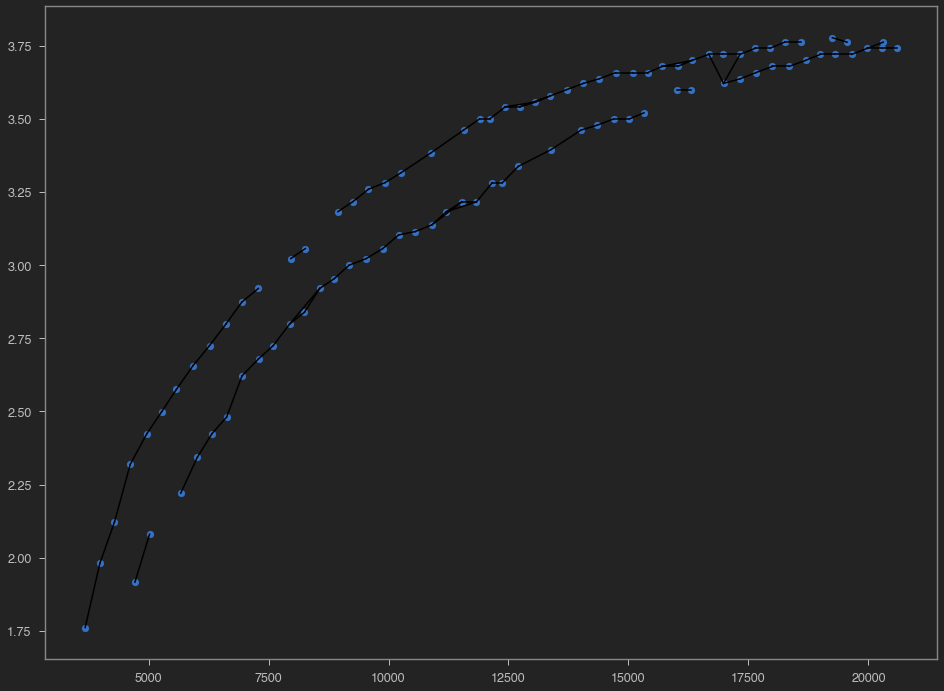

In [8]:
df_ms_bcr, mass_pairs = base_calling_random(df_ms)
df_ms_bcr.shape, len(mass_pairs)
plot_basecalling(df_ms_bcr, mass_pairs, annotate=False)